# **AIN 214 - PA5 - FALL 2024**




**Student Number** : 2220765032

**Name Surname**   : Yiğit Kaya Bağcı


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 03.01.2025 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>



---


# **CLUSTERING**


This assignment aims to deepen your understanding of clustering algorithms and introduce the concept of dimensionality reduction using Principal Component Analysis (PCA). You will use K-Means and Agglomerative Clustering and explore the impact of PCA on these clustering techniques.

---
**Dataset Path:** "Data/wholesale_customers_data.csv"
---

The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.

***Variables***

* FRESH: annual spending (m.u.) on fresh products (Continuous);
* MILK: annual spending (m.u.) on milk products (Continuous);
* GROCERY: annual spending (m.u.)on grocery products (Continuous);
* FROZEN: annual spending (m.u.)on frozen products (Continuous)
* DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
* DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
* CHANNEL: customers Channel - (Hotel/Restaurant/Cafe) (Nominal)
* REGION: customers Region  (Lisnon, Oporto or Other) (Nominal)




# **Necessary Imports**

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# **PART- 1: Data Preprocessing and Visualization (20 Pts)**

---

## 1.1. Explaratory Data Analysis (10 Pts)

* Analyze  the dataset and explain analysis results
* Check and handle missing values and outliers
* Transform raw data into a format suitable for ML algorithms: PCA, and clustering, such as normalization.



In [ ]:
# your code here
path = "/content/wholesale_customers_data.csv"

df_whole_customer = pd.read_csv(path)
df_whole_customer.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [ ]:
# Analyze the dataset and explain analysis results

df_whole_customer.info()

print()
print("Descriptive Statistics")

df_whole_customer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB

Descriptive Statistics


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
# finding null value count, if there are any null values we should impute them.
print("NUll Value Count")

df_whole_customer.isnull().sum()

NUll Value Count


,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [ ]:
# Check and handle missing values and outliers

# Columns to detect and handle outliers for numerical data
outlier_numerical_columns= ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Dictionary to store outliers for each column
outlier_memory = dict()

# New cleaned data.
clean_whole_customer_df = df_whole_customer.copy()

# Outlier dedection and clean from outliers.

# Detect and handle outliers using IQR method
for numerical_column in outlier_numerical_columns:
    #Percentiles and range
    quartile1 = clean_whole_customer_df[numerical_column].quantile(0.25)
    quartile3 = clean_whole_customer_df[numerical_column].quantile(0.75)
    IQ_range = quartile3 - quartile1

    # Identify outliers directly using the condition
    outlier_condition = (clean_whole_customer_df[numerical_column] < (quartile1 - 1.5 * IQ_range)) | (clean_whole_customer_df[numerical_column] > (quartile3 + 1.5 * IQ_range))
    outliers = clean_whole_customer_df[numerical_column][outlier_condition]

    # Store outliers in the dictionary
    outlier_memory[numerical_column] = outliers

    #Remove outliers from the cleaned Dataframe.
    clean_whole_customer_df = clean_whole_customer_df[~outlier_condition]


In [ ]:
# Showing numerical outliers by using outlier_memory.
outlier_numerical_columns= ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for column in outlier_numerical_columns:
    print(f"Outliers in {column}:")
    print(outlier_memory[column])
    print()

Outliers in Fresh:
29      43088
39      56159
47      44466
52      40721
87      43265
103     56082
125     76237
129     42312
176     45640
181    112151
239     47493
258     56083
259     53205
282     49063
284     68951
285     40254
289     42786
370     39679
377     38793
436     39228
Name: Fresh, dtype: int64

Outliers in Milk:
23     36423
28     20484
45     22044
49     21412
56     29892
61     38369
65     20959
85     46197
86     73498
92     27472
109    16729
171    25862
183    43950
211    28326
216    16599
251    23133
254    17972
265    23527
309    20655
319    25071
325    16784
358    18664
384    21858
427    16687
Name: Milk, dtype: int64

Outliers in Grocery:
43     23998
46     21955
71     21042
77     28540
145    34792
163    26870
200    23127
201    24708
205    23596
266    22182
304    24773
306    21570
331    26839
333    67298
343    26316
351    22294
353    21203
357    22272
437    30243
Name: Grocery, dtype: int64

Outliers in Frozen:
2

In [ ]:
# Check and handle missing values and outliers
# Columns to detect and handle outliers for nominal data

clean_whole_customer_df = df_whole_customer.copy()
nominal_variables = ["Channel", "Region"]

for column in nominal_variables:
    unique_values = clean_whole_customer_df[column].unique()
    print(f"Unique values in {column}: {unique_values}")
    # count of vals
    value_counts = clean_whole_customer_df[column].value_counts()
    print(f"Value counts in {column}:")
    print(value_counts)
    print()

"""
As a result of it we can inference that there is no need to handle missing values and outliers.
"""

Unique values in Channel: [2 1]
Value counts in Channel:
Channel
1    298
2    142
Name: count, dtype: int64

Unique values in Region: [3 1 2]
Value counts in Region:
Region
3    316
1     77
2     47
Name: count, dtype: int64



'\nAs a result of it we can inference that there is no need to handle missing values and outliers.\n'

In [ ]:
# I will use standardization to prepare the raw data into a suitable format for PCA and clustering.
# Standardization transforms the data by scaling each feature to have a mean of 0 and a standard deviation of 1.

# Continous columns.
numerical_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Select and apply standart scaler.
selected_scaler = StandardScaler()
clean_whole_customer_df[numerical_cols] = selected_scaler.fit_transform(clean_whole_customer_df[numerical_cols])

# Results.
clean_whole_customer_df[numerical_cols].head(15)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
5,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224
6,0.009950,-0.352316,-0.102849,-0.534512,0.054280,-0.347854
7,-0.349981,-0.113981,0.155359,-0.289315,0.092286,0.369601
8,-0.477901,-0.291409,-0.185336,-0.545854,-0.244726,-0.275079
9,-0.474497,0.718495,1.151423,-0.394488,0.954031,0.203461


## 1.2. Data Visualization (10 Pts)

* Visualize the distribution of features
* Plot a correlation heatmap to analyze their relationships.
* Comment on any findings

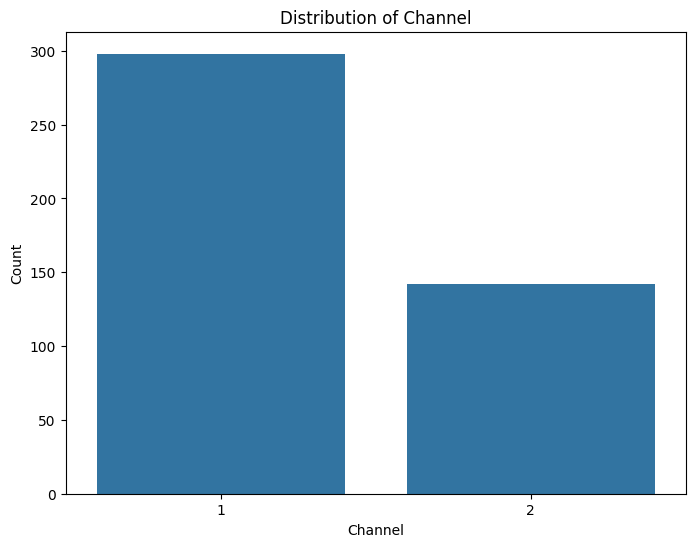

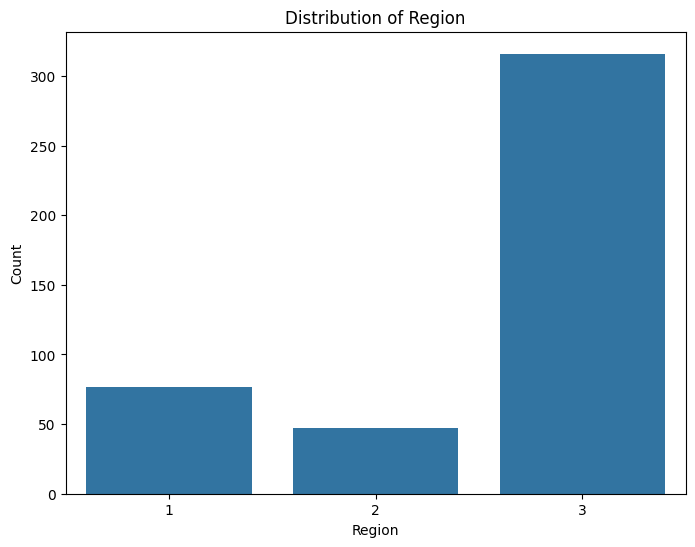

In [ ]:
# To visualize nominal variables, we can use bar chart.

nominal_variables = ["Channel", "Region"]

for nominal_col in nominal_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=clean_whole_customer_df, x=nominal_col)
    plt.title("Distribution of " +  nominal_col)
    plt.xlabel(nominal_col)
    plt.ylabel("Count")
    plt.show()

In [ ]:
"""
The data shows that Channel 1 is the dominant channel with significantly more transactions compared to Channel 2. Similarly, Region 3 has the highest number of transactions,
far exceeding Regions 1 and 2. This indicates that most of the activity in the dataset comes from Channel 1 and Region 3.
"""

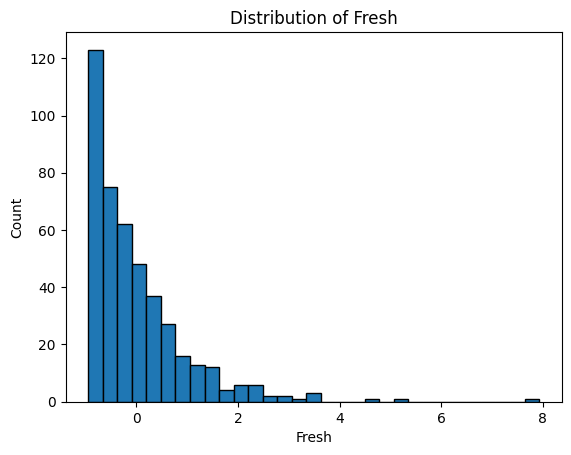

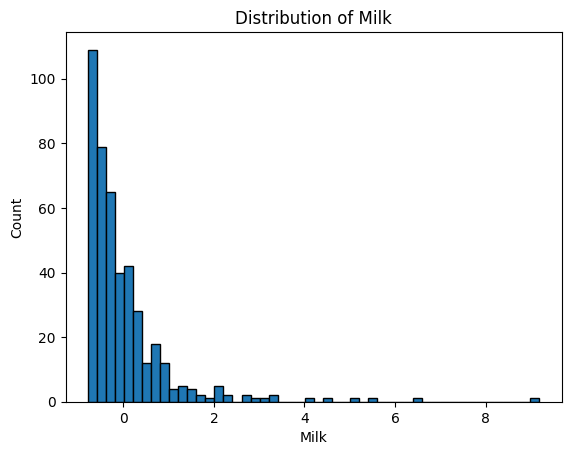

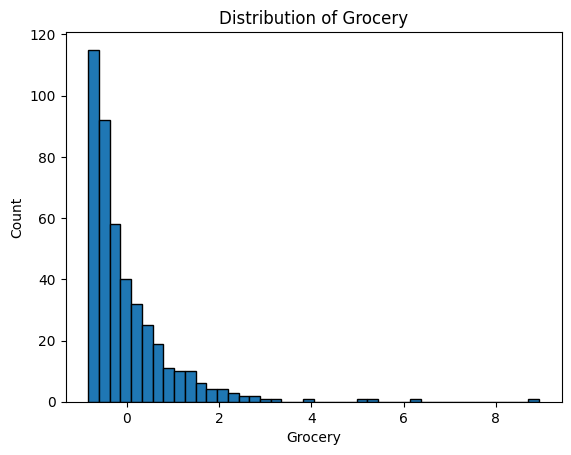

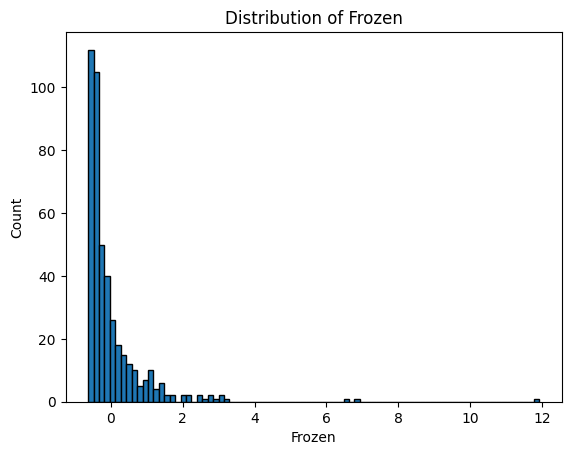

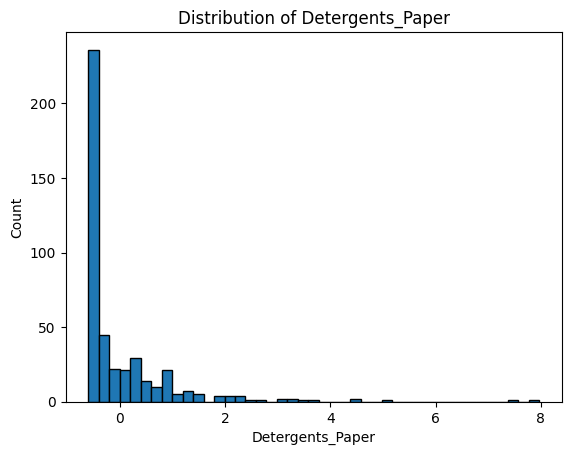

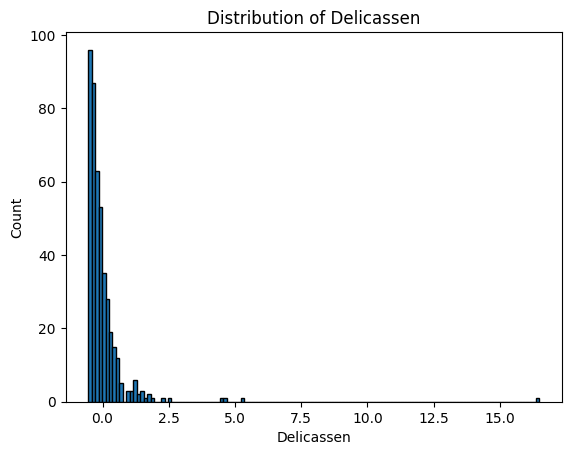

In [ ]:
# To visualize continous variables, we can use histogram.

numerical_variables = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for numerical_col in numerical_variables:
    plt.hist(clean_whole_customer_df[numerical_col] , bins = 'auto', edgecolor = 'black')
    plt.title("Distribution of " + numerical_col)
    plt.xlabel(numerical_col)
    plt.ylabel('Count')
    plt.show()

In [ ]:
"""
All categories (Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicatessen)
show highly skewed distributions with most values near zero and only a few high values.
This indicates most customers spend small amounts, with a few outliers spending significantly more.
"""

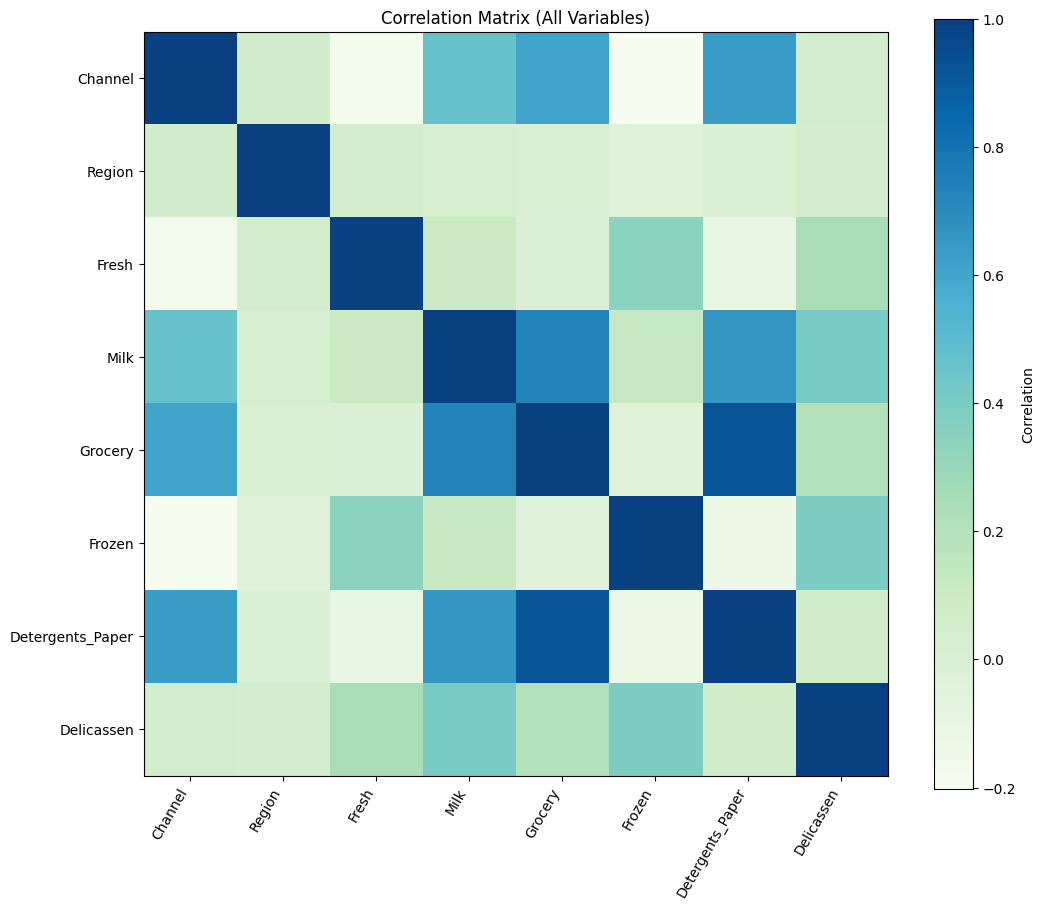

In [ ]:
#Plot a correlation heatmap to analyze their relationships.

# All columns (both nominal and continuous)
all_cols = clean_whole_customer_df.select_dtypes(include=['int64', 'float64']).columns

# Heatmap for all columns.
plt.figure(figsize=(12, 10))
all_corr_matrix = clean_whole_customer_df[all_cols].corr()
plt.imshow(all_corr_matrix, cmap='GnBu', interpolation='nearest')
plt.xticks(ticks=range(len(all_corr_matrix.columns)), labels=all_corr_matrix.columns, rotation=60, ha='right')
plt.yticks(ticks=range(len(all_corr_matrix.columns)), labels=all_corr_matrix.columns)
plt.colorbar(label="Correlation")
plt.title("Correlation Matrix (All Variables)")
plt.show()

In [ ]:
"""
Detergents_Paper, Grocery, and Milk are strongly correlated, indicating shared spending trends. Fresh, Frozen, and Delicatessen show weak correlations, reflecting distinct patterns.
Channel has minimal influence on spending behavior.
"""

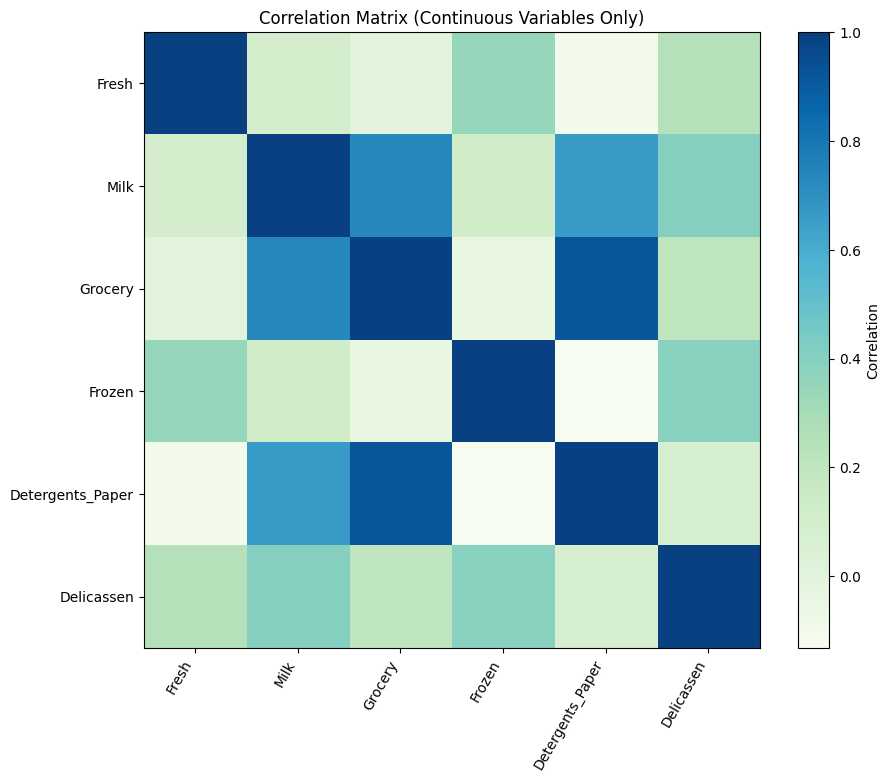

In [ ]:
# Heatmap for only continous variables.

# Only Continous columns

# Select columns
continous_cols = clean_whole_customer_df.select_dtypes(include=['float64']).columns

# Plot the heatmap.
plt.figure(figsize=(10, 8))
continuous_corr_matrix = clean_whole_customer_df[continous_cols].corr()
plt.imshow(continuous_corr_matrix, cmap='GnBu', interpolation='nearest')
plt.xticks(ticks=range(len(continuous_corr_matrix.columns)), labels=continuous_corr_matrix.columns, rotation=60, ha='right')
plt.yticks(ticks=range(len(continuous_corr_matrix.columns)), labels=continuous_corr_matrix.columns)
plt.colorbar(label="Correlation")
plt.title("Correlation Matrix (Continuous Variables Only)")
plt.show()

In [ ]:
"""
Grocery, Milk, and Detergents_Paper are closely linked, often purchased together. Fresh, Frozen, and Delicatessen remain uncorrelated, highlighting independent spending behaviors.
"""

# **PART- 2: Clustering on the Original Dataset (30 points)**



## 2.1 K-Means Clustering on the Original Dataset (15 points)

* Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.


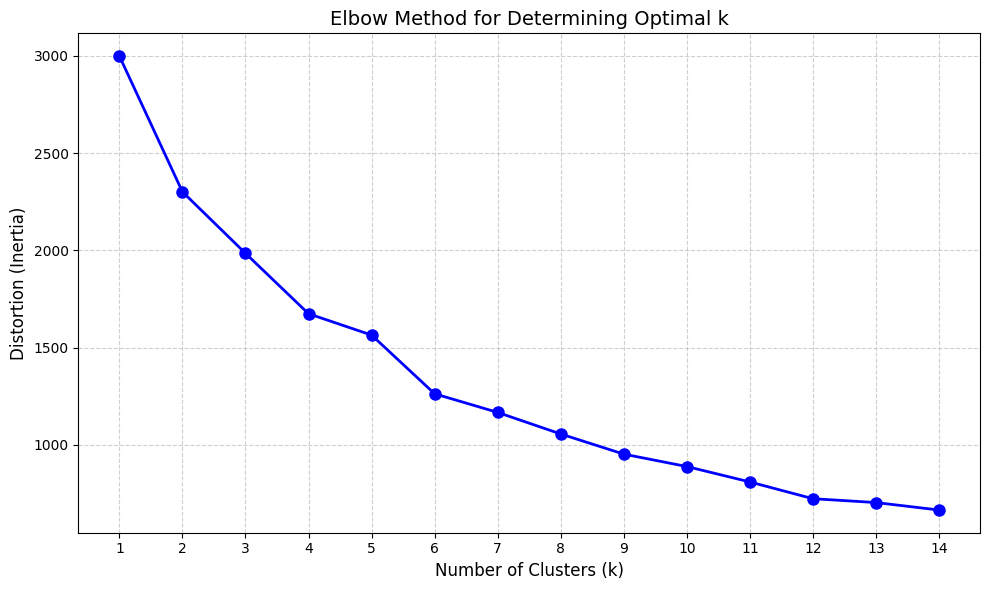

In [ ]:
# Appending K values in list.
k_values = list()
for i in range(1,15):
  k_values.append(i)

centers_distances = list()

# Calculate distances for each k value.
for k in k_values:
  kmean_strat = KMeans(n_clusters=k, random_state=34)
  kmean_strat.fit(clean_whole_customer_df)
  centers_distances.append(kmean_strat.inertia_)

# Visulize the inertias and k to apply elbow method.
plt.figure(figsize=(10, 6))
plt.plot(k_values, centers_distances, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Distortion (Inertia)', fontsize=12)
plt.title('Elbow Method for Determining Optimal k', fontsize=14)
plt.xticks(k_values)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
;"""
OPTIMAL K VALUE USING ELBOW METHOD.
Based on the Elbow Method, the optimal number of clusters (𝑘) is determined to be 4.
This conclusion is drawn from the rapid decrease in distortion values up to k=4,
followed by a slower rate of decrease for higher k values. This indicates that adding more clusters
beyond 𝑘=4 results in diminishing returns, making k=4 the most suitable choice for this dataset.
"""

'\nOPTIMAL K VALUE USING ELBOW METHOD.\nBased on the Elbow Method, the optimal number of clusters (𝑘) is determined to be 4. \nThis conclusion is drawn from the rapid decrease in distortion values up to k=4, \nfollowed by a slower rate of decrease for higher k values. This indicates that adding more clusters\nbeyond 𝑘=6 results in diminishing returns, making k=4 the most suitable choice for this dataset.\n'

In [ ]:
# Calculate k_means with optimal k value.
chosen_k_value = 4

k_means = KMeans(n_clusters=chosen_k_value, random_state=34)
k_means.fit(clean_whole_customer_df)

# Add cluster labels to the dataframe
clean_whole_customer_df = clean_whole_customer_df.assign(Cluster=k_means.labels_)

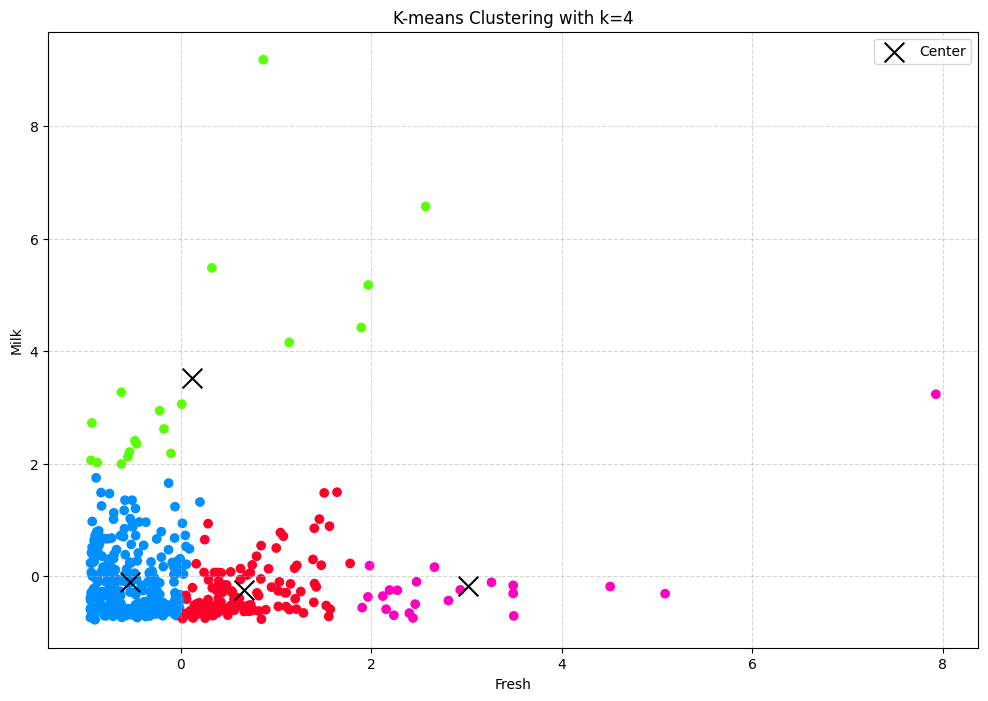

In [ ]:
# Visualize the resulting clusters with our optimal k value.

# Since human perception is limited to 2 or 3 dimensions,
# we selected only two continuous features (Fresh and Milk) for visualization.
# This approach provides a simple and intuitive representation of the cluster distribution.


# Select only the columns used for clustering
selected_columns = ['Fresh', 'Milk']

# Recalculate the scaler on only the selected columns
scaled_data = selected_scaler.fit_transform(clean_whole_customer_df[selected_columns])

# Fit K-means on scaled data
k_means = KMeans(n_clusters=chosen_k_value, random_state=643434)
k_means.fit(scaled_data)

# Revert centroids to original scale
original_centroids = selected_scaler.inverse_transform(k_means.cluster_centers_)

# Add cluster labels to the dataframe
clean_whole_customer_df['Cluster'] = k_means.labels_

# Visualize the clusters
plt.figure(figsize=(12, 8))
plt.scatter(clean_whole_customer_df['Fresh'], clean_whole_customer_df['Milk'],c=clean_whole_customer_df['Cluster'], cmap='gist_rainbow_r')

# Visualizing the centroids on the original scale
first_centroid = original_centroids[:, 0]
sec_centroid = original_centroids[:, 1]
plt.scatter(first_centroid, sec_centroid,c='black', marker='x', s=200, label='Center')

plt.title('K-means Clustering with k=4')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.legend()
plt.grid(alpha=0.5, linestyle='--')
plt.show()


## 2.2. Hierarchical Agglomerative Clustering (HAC) on the Original Dataset (15 points)

* Apply HAC on the dataset, visualize the dendogram. Then, comment on whether the dendogram agrees with the clusters obtained by K-Means. Try with 2 different linkage methods.

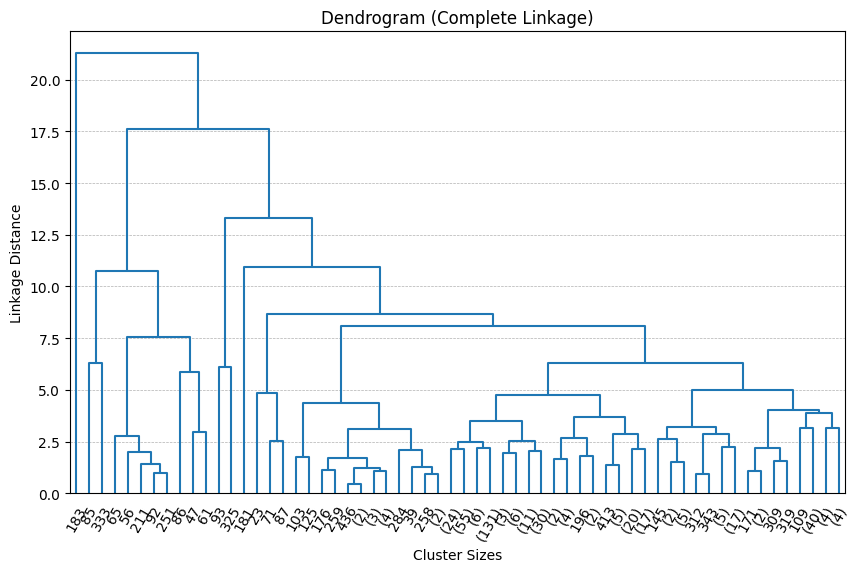

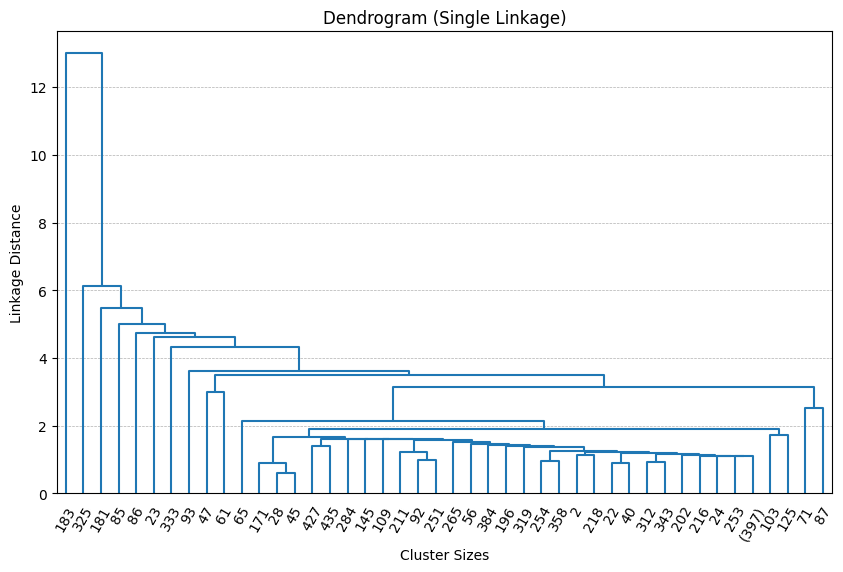

In [ ]:
# Complete linkage
complete_link = linkage(clean_whole_customer_df[numerical_cols], method='complete')

# Single linkage
sinlge_link = linkage(clean_whole_customer_df[numerical_cols], method='single')

# Complete linkage dendrogram: focuses on the maximum distance between clusters.
plt.figure(figsize=(10, 6))
dendrogram(complete_link, color_threshold=0, leaf_rotation=60, leaf_font_size=10, truncate_mode='level', p=10)
plt.title('Dendrogram (Complete Linkage)')
plt.xlabel('Cluster Sizes')
plt.ylabel('Linkage Distance')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()
# Single linkage dendrogram: focuses on the minimum distance between clusters, which may cause a chaining effect.
plt.figure(figsize=(10, 6))
dendrogram(sinlge_link, color_threshold=0,truncate_mode='level', p=30, leaf_rotation=60., leaf_font_size=10)
plt.title('Dendrogram (Single Linkage)')
plt.xlabel('Cluster Sizes')
plt.ylabel('Linkage Distance')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
"""
INFERENCE
"The Complete linkage dendrogram aligns well with the 𝑘=4 clusters from K-Means, showing distinct groupings.
In contrast, the Single linkage dendrogram exhibits a chaining effect, making clusters less distinct.
Overall, Complete linkage agrees better with K-Means for this dataset."
"""

# **PART- 3: Dimensionality Reduction (30 points)**

### *What is Dimensionality Reduction and Why is it Used?*

Dimensionality reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. It is an attempt to reduce the complexity of the task as an attempt to remove the curse of dimensionality - also for visualization purposes.

### *Principal Component Analysis (PCA)*

PCA is a technique that transforms original correlated features into new uncorrelated features (principal components) based on variance. **Process:**

* **Linear Combinations of Features:** PCA begins by creating linear combinations of the existing features in the dataset.
* **First Principal Component:** The first principal component (PC1) is the linear combination that captures the highest variance in the dataset. Mathematically, this is the direction in which the data varies the most.
* **Subsequent Principal Components:** Each following principal component is the linear combination of features that captures the highest variance possible while being orthogonal (perpendicular) to all previously determined principal components. This ensures that each new principal component adds unique information.
* **Covariance Matrix and Eigenvectors:** The process of finding these principal components corresponds to computing the eigenvectors of the covariance matrix of the data. The covariance matrix encapsulates how each pair of variables in the dataset co-varies.
* **Eigenvalues:** The eigenvalues associated with each eigenvector (principal component) indicate the amount of variance that the principal component explains. Larger eigenvalues mean more variance explained.


***You can use scikit-learn***




## 3.1. Apply PCA (15 Pts)

* Normalize the data
* Apply PCA to the normalized data using scikit-learn
* Visualize the data with the first two principal components (PC) as the axes. Do you see any clusters?
* Components selection: Visualize the variance explained by each PC. Then choose the number of components that explain the data sufficiently enough.
* Comment on any findings

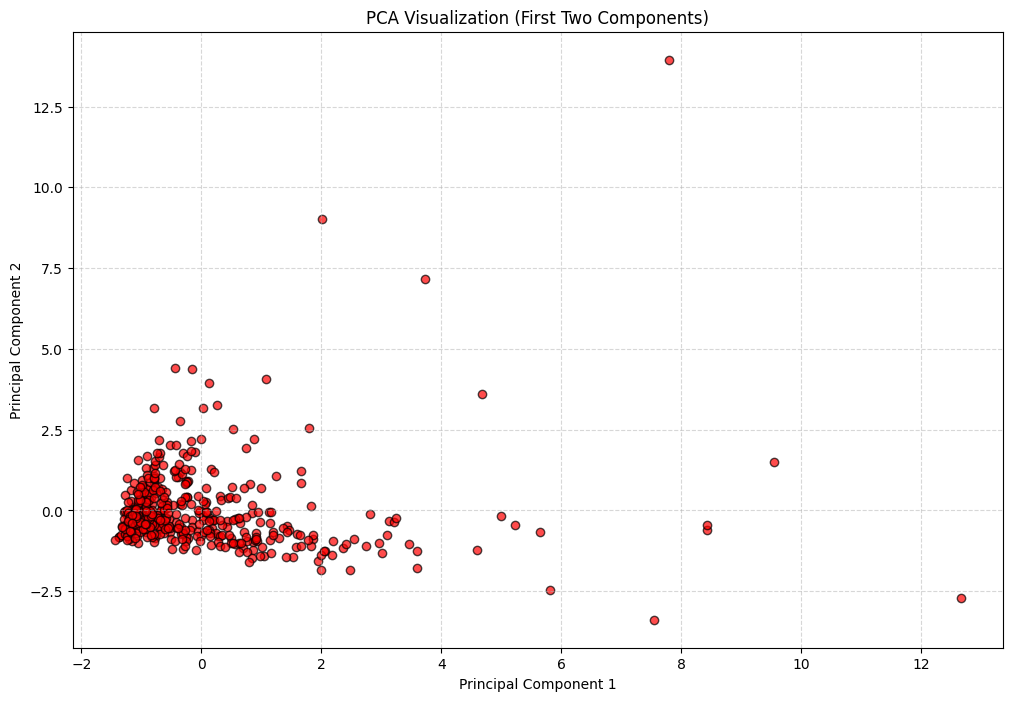

In [ ]:
# Apply PCA on all numerical columns
pca_process = PCA(n_components=len(numerical_cols))
pca_transformed = pca_process.fit_transform(clean_whole_customer_df[numerical_cols])

# Create a list for column names
column_names = []
for i in range(len(numerical_cols)):
    column_name = "PC" + str(i + 1)
    column_names.append(column_name)

# Create the DataFrame for PCA-transformed data
pca_df = pd.DataFrame(data=pca_transformed, columns=column_names)

# Visualize the first two principal components
plt.figure(figsize=(12, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, color='red', edgecolors='k')
plt.title('PCA Visualization (First Two Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
"""
The PCA visualization shows that most points are grouped near the center, forming a dense cluster. This suggests that the majority of the data shares similar characteristics.
However, there are a few points spread further away from the main cluster, indicating they may represent different patterns or behaviors.
All in all, the data strongly forms one big cluster with some noticeable outliers.
"""

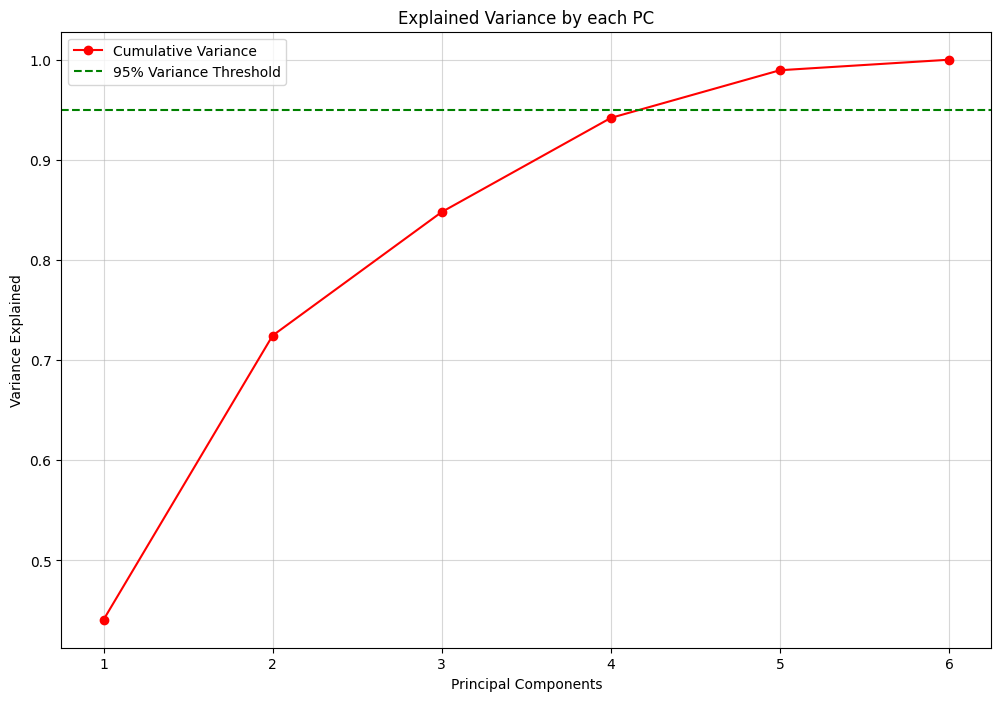

Number of components to bigger than threshold.
5


In [ ]:
# Compute explained variance ratio and cumulative variance
var_ratio = pca_process.explained_variance_ratio_
cum_variance = pd.Series(var_ratio).cumsum()

# visualize explained variance and cumulative variance
plt.figure(figsize=(12, 8))

# cumulative variance line plot
plt.plot(range(1, len(cum_variance) + 1), cum_variance, marker='o', color='r', label='Cumulative Variance')

# threshold for 95% variance
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance Threshold')

# plot settings
plt.title('Explained Variance by each PC')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

threshold = 0.95
sufficient_components = cum_variance[cum_variance >= threshold].index[0] + 1
# Number of components to explain data
print("Number of components to bigger than threshold.")
print(sufficient_components)

In [ ]:
"""
The plot shows that we need four principal components (PCs) to explain more than 95% of the variance. The first two PCs explain most of the data,
but adding the third and fourth PCs helps cross the 95% threshold. So, choosing four components is a good way to reduce the data size while keeping enough information.
"""

## 3.2. K-means Clustering with PCA (15 Pts)
* Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.

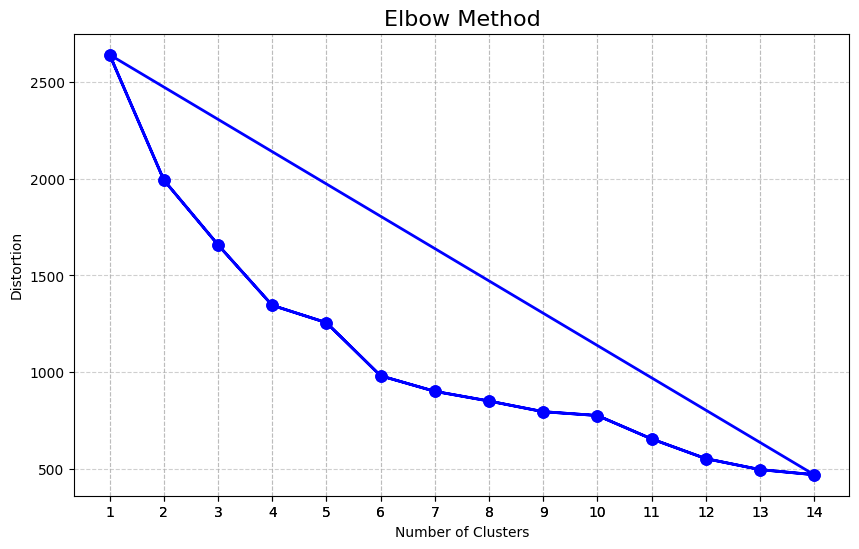

In [ ]:
k_means_values = list()
for i in range(1,15):
  k_values.append(i)

centers_distances = list()

# Calculate distances for each k value.
for k in k_values:
  kmean_strat = KMeans(n_clusters=k, random_state=34)
  kmean_strat.fit(pca_df)
  centers_distances.append(kmean_strat.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, centers_distances, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method', fontsize=16)
plt.xticks(k_values)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

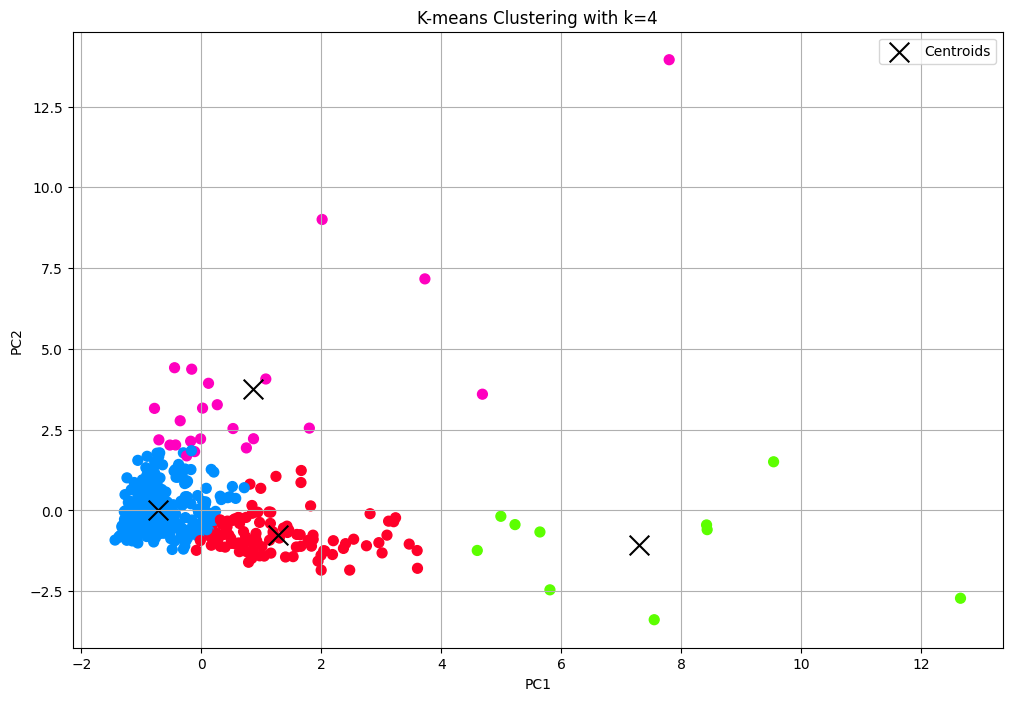

In [ ]:
# chosen k=4 as the optimal number of clusters since the elbow point shows rapid drop slows down at k=4

# Apply k_means cluster with that optimal k.
k_means_pca = KMeans(n_clusters=4, random_state=64)
k_means_pca.fit(pca_df)

# Add cluster labels to the dataframe
pca_df = pca_df.assign(Cluster=k_means_pca.labels_)

first_pca = k_means_pca.cluster_centers_[:, 0]
second_pca = k_means_pca.cluster_centers_[:, 1]

# Visuilize the clusters.
plt.figure(figsize=(12, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='gist_rainbow', s=50)
plt.scatter(first_pca, second_pca, c='black', marker='x', s=200, label='Centroids')
plt.title('K-means Clustering with k=4')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()


# **PART- 4: Evaluate the Clustering Results (20 points)**

* Evaluate and compare the clustering results (k means with and without PCA) using the Silhouette Coefficients.

* Identify which clustering method and dataset version (original vs. PCA-reduced) resulted in the best clustering.

* Discuss the impact of dimensionality reduction (PCA) on clustering performance.

* Highlight any differences in performance between K-Means and Agglomerative Clustering.

In [ ]:
# Apply K-Means on original dataset
k_means_original_data = KMeans(n_clusters=4, random_state=3464)
k_means_original_data_columns = k_means_original_data.fit_predict(clean_whole_customer_df)
Silhouette_score = silhouette_score(clean_whole_customer_df, k_means_original_data_columns)
print("Silhouette Score for K-Means on Original Data:", Silhouette_score)

# Applying K-Means on dataset with PCA.
K_means_pca_data = KMeans(n_clusters=4, random_state=3464)
K_means_pca_data_columns = K_means_pca_data.fit_predict(pca_df)
Silhouette_score_pca = silhouette_score(pca_df, K_means_pca_data_columns)
print("Silhouette Score for K-Means on PCA-Reduced Data:", Silhouette_score_pca)

print()

"""
Using PCA before K-Means improves the clustering results. The PCA-reduced data creates better-defined clusters compared to the original data.
This shows that PCA helps by removing unnecessary information and making the clustering easier.
"""

Silhouette Score for K-Means on Original Data: 0.3037770818139218
Silhouette Score for K-Means on PCA-Reduced Data: 0.4881397961404465



'\nUsing PCA before K-Means improves the clustering results. The PCA-reduced data creates better-defined clusters compared to the original data. \nThis shows that PCA helps by removing unnecessary information and making the clustering easier.\n'

In [ ]:
# Apply Agglomerative Clustring on original dataset.
Agglomerative_original_data = AgglomerativeClustering(n_clusters=4)
Agglomerative_original_data_columns = Agglomerative_original_data.fit_predict(clean_whole_customer_df)
Silhouette_score_original_Data = silhouette_score(clean_whole_customer_df, Agglomerative_original_data_columns)
print("Silhouette Score for Agglomerative Clustering on Original Data:", Silhouette_score_original_Data)

# Apply Agglomerative Clustring on dataset with PCA.
Agglomerative_pca_data = AgglomerativeClustering(n_clusters=4)
Agglomerative_pca_data_columns = Agglomerative_pca_data.fit_predict(pca_df)
Silhouette_score_pca_data = silhouette_score(pca_df, Agglomerative_pca_data_columns)
print("Silhouette Score for Agglomerative Clustering on PCA-Reduced Data:", Silhouette_score_pca_data)

print()

"""
Using PCA before Agglomerative Clustering improves the clustering results. The PCA-reduced data provides better-defined clusters,
similar to the impact observed in K-Means. This suggests that PCA effectively reduces noise and redundancy in the data, making clustering more meaningful.
"""

Silhouette Score for Agglomerative Clustering on Original Data: 0.27251636329694207
Silhouette Score for Agglomerative Clustering on PCA-Reduced Data: 0.47177862331927173



'\nUsing PCA before Agglomerative Clustering improves the clustering results. The PCA-reduced data provides better-defined clusters, \nsimilar to the impact observed in K-Means. This suggests that PCA effectively reduces noise and redundancy in the data, making clustering more meaningful.\n'

In [ ]:
"""
K-Means and Agglomerative Clustering show similar performance, but there are some differences.

On the original data, K-Means achieved a slightly better Silhouette Score (0.3037) compared to Agglomerative Clustering (0.2725).
Both methods improved on the PCA-reduced data, with K-Means scoring (0.4881) and Agglomerative scoring (0.4717).
This shows that PCA helped both methods by reducing noise and simplifying the dataset.

K-Means performed slightly better overall, especially after PCA, likely because it relies on centroid-based clustering,
which benefits more from reduced dimensions. In conclusion, K-Means may be a better choice for this dataset, particularly when using PCA.
"""

# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw5.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.